<a href="https://colab.research.google.com/github/tlmartiner/Integracion_de_datos_y_prospectiva/blob/main/Reto_1_Tania_Mart%C3%ADnez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Caracterización Distribución Agregada de Pérdidas**

Se quiere caracterizar (Media, Desviación, Asimetria, Kurtosis) la distribución de pérdidas como resultado de las pérdidas a los créditos que posee una FINTECH. Las variables que definen la Loss Distribustion Approach (LDA) (distribución agregada de pérdidas) se obtiene del producto de las siguientes variables:
* Monto (EAD): Es el monto de dinero que una persona solicita a la FINTECH.
* Probabilidad Default: Es la probabilidad de que una persona incumpla el crédito a lo largo de su vigencia
* LGD (Loss Guarantee Default): Es la garantía que el solicitante puede colocar sobre el crédito (Carro, casa, beca, finca).

**0. Se cargan las librerías de trabajo**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #Para gráficos de distribuciones

In [ ]:
# Conexión con mi unidad en Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**ANÁLISIS AÑO 1 (Hoja 5)**

**1. Se cargan los datos del año 1 - hoja 5**

In [ ]:
# DataFrame = Tabla de datos
nxl = pd.read_excel('/content/drive/MyDrive/SEMESTRE 9/Integración de datos y prospectiva/Bases de datos/1. SolicitantesCrédito(USD)_Años.xlsx')
XDB = pd.read_excel('/content/drive/MyDrive/SEMESTRE 9/Integración de datos y prospectiva/Bases de datos/1. SolicitantesCrédito(USD)_Años.xlsx', sheet_name=5)
display(XDB)

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,6436,54,Mujer,Separado,0,1,1,3,Técnico,Indefinido,...,18,87.483415,Buenas Referencias,Codeudor,Sin Patrimonio,Mora mayor a 60 Dìas,1,0.024565,623.369751,0.457573
1,6437,28,Hombre,Casado,1,0,0,3,Tecnólogo,Ninguno,...,60,6.849567,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.113544,491.716217,0.528300
2,6438,27,NR,Soltero,1,1,1,2,Primaria,Indefinido,...,48,5.907680,Buena Experiencia CFB,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,0,0.140295,416.151337,0.116118
3,6439,43,Mujer,Soltero,3,3,3,2,Técnico,Ninguno,...,36,8.664364,Buena Experiencia CFB,Libranza Establecida,Prop.sin Hipoteca,Sin experiencia,0,0.289542,381.160431,0.606498
4,6440,49,Mujer,Soltero,0,1,1,2,Bachiller,Ninguno,...,3,167.064101,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.135805,378.608978,0.046469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,8372,48,Hombre,Separado,0,0,0,3,Tecnólogo,Fijo,...,36,27.043503,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.056132,550.980408,0.122566
1338,8374,31,Hombre,Soltero,2,0,0,5,Bachiller,Indefinido,...,48,25.579568,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.035120,659.471375,0.321453
1339,8375,38,Hombre,Separado,0,0,0,3,Bachiller,Labor Contratada,...,36,21.508792,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.101976,465.011536,0.017814
1340,8376,43,Mujer,Casado,1,2,2,2,Tecnólogo,Ninguno,...,36,11.047468,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.156707,423.237305,0.265477


**2. Caraterización de la distribución LDA año 1**

In [ ]:
#Se calcula la distribución LDA
LDA = XDB.iloc[:,25]*XDB.iloc[:,33]*(1+XDB.iloc[:,35])
XDB['LDA'] = LDA

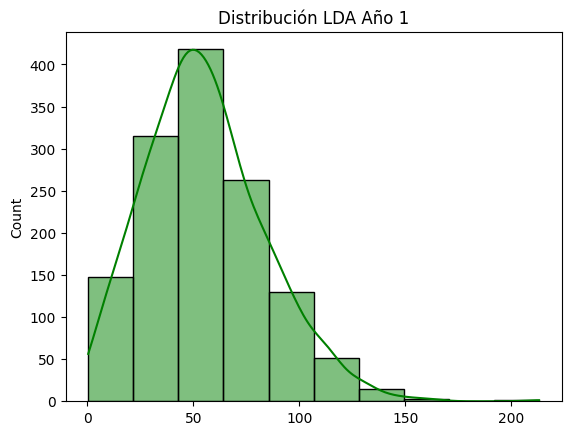

,LI,LS,ND,Perdida
0,0.413092,21.695260,147.0,11.054176
1,21.695260,42.977428,315.0,32.336344
2,42.977428,64.259597,418.0,53.618513
3,64.259597,85.541765,263.0,74.900681
4,85.541765,106.823933,130.0,96.182849
5,106.823933,128.106101,51.0,117.465017
6,128.106101,149.388270,14.0,138.747186
7,149.388270,170.670438,3.0,160.029354
8,170.670438,191.952606,0.0,181.311522
9,191.952606,213.234775,1.0,202.593690


In [ ]:
NC = 10 #Clusters

plt.figure()
sns.histplot(LDA, kde = True, bins = NC, color = 'green')
plt.title('Distribución LDA Año 1')
plt.show()

#Obtenemos la información de la distribución
counts, bins_edges = np.histogram(LDA, bins = NC)  #Bind_edge son los limites

#Para obtener los limites discriminados por inferior y superior
LI = bins_edges[:-1]; LS = bins_edges[1:]

#Para conocer la marca de clase --> El valor representativo de cada intervalo
mc = (LI+LS)/2

#Se crea la tabla de caracterización
TAsq = np.column_stack((LI, LS, counts, mc))
df = pd.DataFrame(TAsq, columns = ['LI', 'LS', 'ND', 'Perdida'])
display(df)


**3. Se obtiene las medidas de dispersión (Asimetria, Kurtosis) y tendencia central (Media, varianza, dispersión) año 1**

In [ ]:
u = np.sum(mc*counts)/np.sum(counts) # Valor esperado
print ("La media de los datos es:", u)

varianza = np.sum(counts*(mc-u)**2)/np.sum(counts) #Si tengo más intervalos es más preciso
print ("La varianza de los datos es:", varianza)

desviacion = np.sqrt(varianza)
print ("La desviación de los datos es:", desviacion)

#Quiero identificar datos raros o outliers
LIe = u-2*desviacion; LSe = u+2*desviacion
filas_out = np.where((LDA<LIe)|(LDA>LSe)) [0]
LDA.iloc[filas_out]
#np.countsnonzero(filas_out) #--> Para contar los outliers

from scipy.stats import skew, kurtosis
print("El coeficiente de Asímetria colab es", skew(LDA))
print("El coeficiente de Curtosis colab es", kurtosis(LDA))

#Coeficiente de Asímetria
cas = np.sum(counts*(mc-u)**3)/(np.sum(counts)*desviacion**3)
print ("El coeficiente de asimetría es:", cas)
vcas = (skew(LDA)-cas)/skew(LDA)
print ("La variación de coeficiente de asímetria es:", vcas*100)

# Coeficiente de Cuertosis
curt = np.sum(counts*(mc-u)**4)/(np.sum(counts)*desviacion**4)-3
print ("El coeficiente de curtosis es:", curt)

La media de los datos es: 55.91800167999396
La varianza de los datos es: 836.1104127631511
La desviación de los datos es: 28.91557387919443
El coeficiente de Asímetria colab es 0.6074481010737891
El coeficiente de Curtosis colab es 0.6938886954460353
El coeficiente de asimetría es: 0.5936899030624093
La variación de coeficiente de asímetria es: 2.2649174451380043
El coeficiente de curtosis es: 0.49072605058951346


**4. Los parámetros de riesgo para el año 1 son: Pérdidas Esperadas, Pérdidas no Esperadas, Péridas Catastróficas.**

De acuerdo con la bases de datos, para el año 1 se puede observar un total de 1342 datos y un total de 36 variables socioeconómicas. De las medidas de tedencia central, se puede observar que la media de las pérdidas para el año 1 se ubicó en 55.918 dólares por crédito, mientras que la desviación de los datos se ubicó en promedio en los 28 dólares. Es importante mencionar que el coeficiente de asíme9tría se ubicó levemente por encima de cero con un 0.59, lo que indica que la distribución tiende a ser de cola larga, con una curtosis de 0.4, lo que indica que los datos están extendidos y hay gran dispersión de ellos. En este sentido se pudo evidenciar un total de 43 datos outliers, con respecto al total de los datos, esto representa el 3.2% (43/1342) de los datos raros, lo que está por debajo de 5%.

In [ ]:
PE = len(np.where(LDA<u)[0])
print("Las péridadas esperadas son:", PE)
OpVar = np.percentile(LDA, 99.9)
print("El costo de aseguramietno de cada crédito es", OpVar)
PC = len(np.where(LDA>OpVar)[0])
print("Las pérdidas catastróficas son:", PC)
PNE = len(np.where((LDA>=u)&(LDA<=OpVar))[0])
print("Las pérdidas no esperadas son:", PNE)

Las péridadas esperadas son: 729
El costo de aseguramietno de cada crédito es 161.29129989014118
Las pérdidas catastróficas son: 2
Las pérdidas no esperadas son: 611


# **ANÁLISIS AÑO 2 (Hoja 4)**


**6. Se cargan los datos del año 2 - hoja 4**

In [ ]:
XDC = pd.read_excel('/content/drive/MyDrive/SEMESTRE 9/Integración de datos y prospectiva/Bases de datos/1. SolicitantesCrédito(USD)_Años.xlsx', sheet_name=4)
display(XDC)

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,4285,52,Hombre,Casado,0,0,0,3,Tecnólogo,Indefinido,...,24,5.966434,Buenas Referencias,Hipoteca,Prop.sin Hipoteca,Mora mayor a 60 Dìas,0,0.253213,358.859253,0.109183
1,4286,31,Hombre,Casado,3,1,1,2,Bachiller,Ninguno,...,3,82.453584,Buenas Referencias,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,0,0.212950,296.161011,0.004476
2,4288,29,NR,Soltero,0,0,0,3,Tecnólogo,Fijo,...,24,22.023156,Buena Experiencia CFB,Sin Codeudor,Prop.sin Hipoteca,Màximo 3 moras 30 Dìas,1,0.105714,406.482330,0.120763
3,4292,38,Mujer,Casado,0,0,0,2,Técnico,Ninguno,...,36,3.179137,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.292361,312.640320,0.162121
4,4294,32,NR,Soltero,1,0,0,3,Bachiller,Fijo,...,36,17.509553,Buenas Referencias,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,0,0.082367,472.922882,0.210041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6431,41,NR,Casado,3,3,3,2,Primaria,Ninguno,...,36,3.565784,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,0,0.310774,363.216125,0.170423
1496,6432,43,Hombre,Viudo,1,1,1,5,Técnico,Fijo,...,24,21.137539,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.129138,489.444824,0.394218
1497,6433,49,NR,Casado,0,2,2,2,Tecnólogo,Ninguno,...,36,27.632010,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.081944,505.672943,0.196060
1498,6434,65,NR,Soltero,3,0,0,2,Bachiller,Indefinido,...,48,14.354478,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.084422,568.723694,0.318254


**7. Caraterización de la distribución LDA año 2**

In [ ]:
#Se calcula la distribución LDA
LDAc = XDC.iloc[:,25]*XDC.iloc[:,33]*(1+XDC.iloc[:,35])
XDC['LDA'] = LDAc

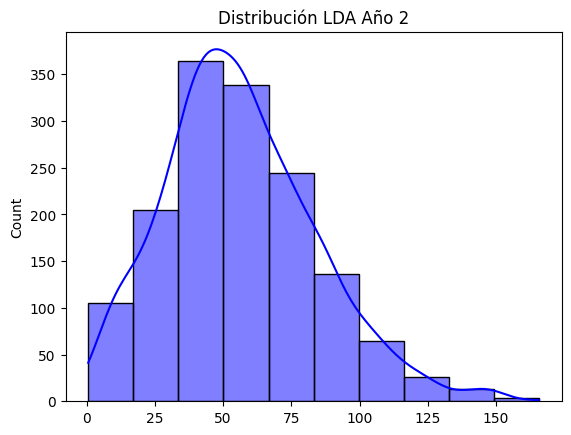

,LI,LS,ND,Perdida
0,0.568346,17.091246,105.0,8.829796
1,17.091246,33.614145,205.0,25.352695
2,33.614145,50.137045,364.0,41.875595
3,50.137045,66.659945,338.0,58.398495
4,66.659945,83.182844,244.0,74.921395
5,83.182844,99.705744,136.0,91.444294
6,99.705744,116.228644,65.0,107.967194
7,116.228644,132.751544,26.0,124.490094
8,132.751544,149.274443,13.0,141.012993
9,149.274443,165.797343,4.0,157.535893


In [ ]:
NC = 10 #Clusters

plt.figure()
sns.histplot(LDAc, kde = True, bins = NC, color = 'blue')
plt.title('Distribución LDA Año 2')
plt.show()

#Obtenemos la información de la distribución
countsc, bins_edges = np.histogram(LDAc, bins = NC)  #Bind_edge son los limites

#Para obtener los limites discriminados por inferior y superior
LIc = bins_edges[:-1]; LSc = bins_edges[1:]

#Para conocer la marca de clase --> El valor representativo de cada intervalo
mcc = (LIc+LSc)/2

#Se crea la tabla de caracterización
TAsqc = np.column_stack((LIc, LSc, countsc, mcc))
dfc = pd.DataFrame(TAsqc, columns = ['LI', 'LS', 'ND', 'Perdida'])
display(dfc)


**8. Se obtiene las medidas de dispersión (Asimetria, Kurtosis) y tendencia central (Media, varianza, dispersión) año 2**

In [ ]:
uc = np.sum(mcc*countsc)/np.sum(countsc) # Valor esperado
print ("La media de los datos es:", uc)

varianzac = np.sum(countsc*(mcc-uc)**2)/np.sum(countsc) #Si tengo más intervalos es más preciso
print ("La varianza de los datos es:", varianzac)

desviacionc = np.sqrt(varianzac)
print ("La desviación de los datos es:", desviacionc)

#Quiero identificar datos raros o outliers
LIec = uc-2*desviacionc; LSec = uc+2*desviacionc
filas_outc = np.where((LDAc<LIec)|(LDAc>LSec)) [0]
LDAc.iloc[filas_out]

from scipy.stats import skew, kurtosis
print("El coeficiente de Asímetria colab es", skew(LDAc))
print("El coeficiente de Curtosis colab es", kurtosis(LDAc))

#Coeficiente de Asímetria
casc = np.sum(countsc*(mcc-uc)**3)/(np.sum(countsc)*desviacionc**3)
print ("El coeficiente de asimetría es:", casc)
vcasc = (skew(LDAc)-casc)/skew(LDAc)
print ("La variación de coeficiente de asímetria es:", vcasc*100)

# Coeficiente de Cuertosis
curtc = np.sum(countsc*(mcc-uc)**4)/(np.sum(countsc)*desviacionc**4)-3
print ("El coeficiente de curtosis es:", curtc)

La media de los datos es: 56.36067049807551
La varianza de los datos es: 794.299449263555
La desviación de los datos es: 28.18331863467386
El coeficiente de Asímetria colab es 0.5654219317544418
El coeficiente de Curtosis colab es 0.3749822454394929
El coeficiente de asimetría es: 0.5398359603970553
La variación de coeficiente de asímetria es: 4.525111234719186
El coeficiente de curtosis es: 0.2591591450063109


**9. Los parámetros de riesgo para el año 2 son: Pérdidas Esperadas, Pérdidas no Esperadas, Péridas Catastróficas.**

De acuerdo con la bases de datos, para el año 2 se puede observar un total de 1500 datos y un total de 36 variables socioeconómicas. De las medidas de tedencia central, se puede observar que la media de las pérdidas para este año se ubicó en 55.360 dólares por crédito, mientras que la desviación de los datos se ubicó en promedio en los 28 dólares. Es importante mencionar que el coeficiente de asimetría se ubicó levemente por encima de cero con un 0.5, lo que indica que la distribución tiende a ser de cola larga, con una curtosis de 0.25, lo que indica que los datos están extendidos y hay dispersión de ellos. En este sentido se pudo evidenciar un total de 49 datos outliers, con respecto al total de los datos, esto representa el 3.2% (49/1500) de los datos raros, lo que está por debajo de 5%.

In [ ]:
PEc = len(np.where(LDAc<uc)[0])
print("Las péridadas esperadas son:", PEc)
OpVarc = np.percentile(LDAc, 99.9)
print("El costo de aseguramiento de cada crédito es", OpVarc)
PCc = len(np.where(LDAc>OpVarc)[0])
print("Las pérdidas catastróficas son:", PCc)
PNEc = len(np.where((LDAc>=uc)&(LDAc<=OpVarc))[0])
print("Las pérdidas no esperadas son:", PNEc)

Las péridadas esperadas son: 813
El costo de aseguramiento de cada crédito es 149.7093186014969
Las pérdidas catastróficas son: 2
Las pérdidas no esperadas son: 685


#**ANÁLISIS AÑO 3 (Hoja 3)**

**10. Se cargan los datos del año 3 - hoja 3**

In [ ]:
XDD = pd.read_excel('/content/drive/MyDrive/SEMESTRE 9/Integración de datos y prospectiva/Bases de datos/1. SolicitantesCrédito(USD)_Años.xlsx', sheet_name=3)
display(XDD)

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,2112,33,Hombre,Casado,0,1,1,4,Técnico,Indefinido,...,18,52.546662,Buenas Referencias,Con Codeudor(es),Prop.sin Hipoteca,Con Experiencia sin Mora,0,0.064700,498.646271,0.005317
1,2115,42,Hombre,Soltero,1,1,1,5,Bachiller,Ninguno,...,18,2.808395,Sin Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,0,0.297233,371.733276,0.295880
2,2116,34,Hombre,Soltero,0,2,2,2,Bachiller,Indefinido,...,36,10.409358,Buenas Referencias,Con Codeudor(es),Prop.sin Hipoteca,Con Experiencia sin Mora,0,0.122595,418.416077,0.004645
3,2117,47,Hombre,Casado,1,0,0,3,Profesional,Indefinido,...,24,80.445793,Buena Experiencia CFB,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,1,0.034746,593.847656,0.385068
4,2118,67,Mujer,Casado,1,0,0,3,Bachiller,Indefinido,...,36,27.508639,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.081015,567.578308,0.054015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,4275,52,NR,Soltero,3,0,0,3,Bachiller,Indefinido,...,36,2.723832,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,0,0.300094,392.462311,0.061951
1497,4277,41,Hombre,Soltero,0,0,0,3,Técnico,Ninguno,...,24,29.256105,Buena Experiencia CFB,Fondo de Garantia,Sin Patrimonio,Con Experiencia sin Mora,1,0.070680,471.957642,0.181782
1498,4279,47,Hombre,Casado,0,0,0,5,Primaria,Indefinido,...,24,48.038625,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.016880,676.783752,0.155792
1499,4281,29,NR,Soltero,0,0,0,2,Bachiller,Ninguno,...,18,26.637042,Buenas Referencias,Con Codeudor(es),Prop.y Vehìculo,Con Experiencia sin Mora,1,0.154959,326.336273,0.511715


**11. Caraterización de la distribución LDA año 3**

In [ ]:
#Se calcula la distribución LDA
LDAd = XDD.iloc[:,25]*XDD.iloc[:,33]*(1+XDD.iloc[:,35])
XDD['LDA'] = LDAd

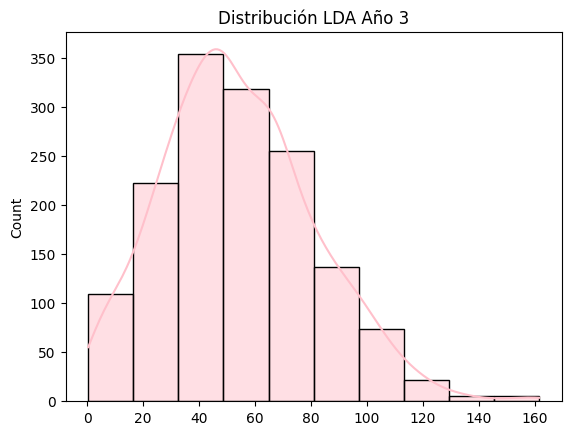

,LI,LS,ND,Perdida
0,0.427835,16.545128,109.0,8.486481
1,16.545128,32.662422,222.0,24.603775
2,32.662422,48.779716,354.0,40.721069
3,48.779716,64.897009,318.0,56.838362
4,64.897009,81.014303,255.0,72.955656
5,81.014303,97.131597,137.0,89.072950
6,97.131597,113.248890,74.0,105.190244
7,113.248890,129.366184,22.0,121.307537
8,129.366184,145.483478,5.0,137.424831
9,145.483478,161.600771,5.0,153.542125


In [ ]:
NC = 10 #Clusters

plt.figure()
sns.histplot(LDAd, kde = True, bins = NC, color = 'pink')
plt.title('Distribución LDA Año 3')
plt.show()

#Obtenemos la información de la distribución
countsd, bins_edges = np.histogram(LDAd, bins = NC)  #Bind_edge son los limites

#Para obtener los limites discriminados por inferior y superior
LId = bins_edges[:-1]; LSd = bins_edges[1:]

#Para conocer la marca de clase --> El valor representativo de cada intervalo
mcd = (LId+LSd)/2

#Se crea la tabla de caracterización
TAsqd = np.column_stack((LId, LSd, countsd, mcd))
dfd = pd.DataFrame(TAsqd, columns = ['LI', 'LS', 'ND', 'Perdida'])
display(dfd)


**12. Se obtiene las medidas de dispersión (Asimetria, Kurtosis) y tendencia central (Media, varianza, dispersión) año 3**

In [ ]:
ud = np.sum(mcd*countsd)/np.sum(countsd) # Valor esperado
print ("La media de los datos es:", ud)

varianzad = np.sum(countsd*(mcd-ud)**2)/np.sum(countsd) #Si tengo más intervalos es más preciso
print ("La varianza de los datos es:", varianzad)

desviaciond = np.sqrt(varianzad)
print ("La desviación de los datos es:", desviaciond)

#Quiero identificar datos raros o outliers
LIed = ud-2*desviaciond; LSed = ud+2*desviaciond
filas_outd = np.where((LDAd<LIed)|(LDAd>LSed)) [0]
LDAd.iloc[filas_outd]
#np.count_nonzero(filas_outd) --> Para contar los outliers

from scipy.stats import skew, kurtosis
print("El coeficiente de Asímetria colab es", skew(LDAd))
print("El coeficiente de Curtosis colab es", kurtosis(LDAd))

#Coeficiente de Asímetria
casd = np.sum(countsd*(mcd-ud)**3)/(np.sum(countsd)*desviaciond**3)
print ("El coeficiente de asimetría es:", casd)
vcasd = (skew(LDAd)-casd)/skew(LDAd)
print ("La variación de coeficiente de asímetria es:", vcasd*100)

# Coeficiente de Cuertosis
curtd = np.sum(countsd*(mcd-ud)**4)/(np.sum(countsd)*desviaciond**4)-3
print ("El coeficiente de curtosis es:", curtd)

La media de los datos es: 54.35795284724899
La varianza de los datos es: 746.4973760157775
La desviación de los datos es: 27.32210416523181
El coeficiente de Asímetria colab es 0.46219026649218486
El coeficiente de Curtosis colab es 0.18859622645960705
El coeficiente de asimetría es: 0.46305726633508854
La variación de coeficiente de asímetria es: -0.18758505008852902
El coeficiente de curtosis es: 0.05620072169277224


De acuerdo con la bases de datos, para el año 3 se puede observar un total de 1501 datos y un total de 36 variables socioeconómicas. De las medidas de tedencia central, se puede observar que la media de las pérdidas para este año se ubicó en 54.357 dólares por crédito, mientras que la desviación de los datos se ubicó en promedio en los 27 dólares. Es importante mencionar que el coeficiente de asimetría se ubicó levemente por encima de cero con un 0.4, lo que indica que la distribución tiende a ser de cola larga, con una curtosis de 0.05, lo que indica que los datos tienen una tendencia a estar centrados. En este sentido se pudo evidenciar un total de 46 datos outliers, con respecto al total de los datos, esto representa el 3% (46/1501) de los datos raros, lo que está por debajo de 5%.

**13. Los parámetros de riesgo para el año 3 son: Pérdidas Esperadas, Pérdidas no Esperadas, Péridas Catastróficas.**

In [ ]:
PEd = len(np.where(LDAd<ud)[0])
print("Las péridadas esperadas son:", PEd)
OpVard = np.percentile(LDAd, 99.9)
print("El costo de aseguramiento de cada crédito es", OpVard)
PCd = len(np.where(LDAd>OpVard)[0])
print("Las pérdidas catastróficas son:", PCd)
PNEd = len(np.where((LDAd>=ud)&(LDAd<=OpVard))[0])
print("Las pérdidas no esperadas son:", PNEd)

Las péridadas esperadas son: 809
El costo de aseguramiento de cada crédito es 160.70668633158058
Las pérdidas catastróficas son: 2
Las pérdidas no esperadas son: 690


#**ANÁLISIS AÑO 4 (Hoja 2)**

**14. Se cargan los datos del año 4 - hoja 2**

In [ ]:
XDE = pd.read_excel('/content/drive/MyDrive/SEMESTRE 9/Integración de datos y prospectiva/Bases de datos/1. SolicitantesCrédito(USD)_Años.xlsx', sheet_name=2)
display(XDE)

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,1,38,NR,Casado,1,0,0,3,Bachiller,Ninguno,...,48,18.375890,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.041659,582.478943,0.168536
1,2,51,NR,Separado,6,1,1,4,Técnico,Ninguno,...,36,5.062492,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.234951,479.839966,0.173085
2,3,37,Mujer,Casado,2,0,0,3,Tecnólogo,Indefinido,...,36,10.287688,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.170330,417.653107,0.082779
3,4,29,NR,Separado,1,0,0,2,Tecnólogo,Ninguno,...,24,15.458878,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.201659,316.791107,0.463798
4,5,42,Mujer,Casado,3,4,4,2,Especializacion,Ninguno,...,24,24.995180,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.140929,441.809570,0.160611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2107,34,Hombre,Separado,0,1,1,2,Técnico,Ninguno,...,48,1.648938,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,0,0.318118,332.775055,0.358276
1496,2109,43,Mujer,Casado,6,0,0,3,Bachiller,Indefinido,...,36,1.617232,Buena Experiencia CFB,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,0,0.319108,386.770935,0.199316
1497,2110,29,Mujer,Casado,1,1,1,3,Ninguno,Indefinido,...,3,132.534580,Buena Experiencia CFB,Fondo de Garantia,Vehìculo sin Prenda,Con Experiencia sin Mora,0,0.149004,351.520782,0.124456
1498,2111,49,Mujer,Casado,1,0,0,5,Bachiller,Indefinido,...,24,43.986039,Buena Experiencia CFB,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.086956,547.640869,0.112639


**15. Caraterización de la distribución LDA año 4**

In [ ]:
#Se calcula la distribución LDA
LDAe = XDE.iloc[:,25]*XDE.iloc[:,33]*(1+XDE.iloc[:,35])
XDE['LDA'] = LDAe

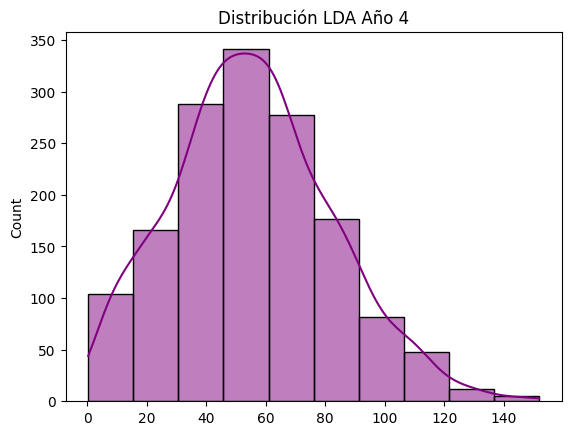

,LI,LS,ND,Perdida
0,0.354255,15.502616,104.0,7.928435
1,15.502616,30.650978,166.0,23.076797
2,30.650978,45.799339,288.0,38.225159
3,45.799339,60.947701,341.0,53.373520
4,60.947701,76.096063,277.0,68.521882
5,76.096063,91.244424,177.0,83.670243
6,91.244424,106.392786,82.0,98.818605
7,106.392786,121.541148,48.0,113.966967
8,121.541148,136.689509,12.0,129.115328
9,136.689509,151.837871,5.0,144.263690


In [ ]:
NC = 10 #Clusters

plt.figure()
sns.histplot(LDAe, kde = True, bins = NC, color = 'purple')
plt.title('Distribución LDA Año 4')
plt.show()

#Obtenemos la información de la distribución
countse, bins_edges = np.histogram(LDAe, bins = NC)  #Bind_edge son los limites

#Para obtener los limites discriminados por inferior y superior
LIe = bins_edges[:-1]; LSe = bins_edges[1:]

#Para conocer la marca de clase --> El valor representativo de cada intervalo
mce = (LIe+LSe)/2

#Se crea la tabla de caracterización
TAsqe = np.column_stack((LIe, LSe, countse, mce))
dfe = pd.DataFrame(TAsqe, columns = ['LI', 'LS', 'ND', 'Perdida'])
display(dfe)


**16. Se obtiene las medidas de dispersión (Asimetria, Kurtosis) y tendencia central (Media, varianza, dispersión) año 4**

In [ ]:
ue = np.sum(mce*countse)/np.sum(countse) # Valor esperado
print ("La media de los datos es:", ue)

varianzae = np.sum(countse*(mce-ue)**2)/np.sum(countse) #Si tengo más intervalos es más preciso
print ("La varianza de los datos es:", varianzae)

desviacione = np.sqrt(varianzae)
print ("La desviación de los datos es:", desviacione)

#Quiero identificar datos raros o outliers
LIee = ue-2*desviacione; LSee = ue+2*desviacione
filas_oute = np.where((LDAe<LIee)|(LDAe>LSee)) [0]
LDAe.iloc[filas_oute]
#np.count_nonzero(filas_outd) #--> Para contar los outliers

from scipy.stats import skew, kurtosis
print("El coeficiente de Asímetria colab es", skew(LDAe))
print("El coeficiente de Curtosis colab es", kurtosis(LDAe))

#Coeficiente de Asímetria
casa = np.sum(countse*(mce-ue)**3)/(np.sum(countse)*desviacione**3)
print ("El coeficiente de asimetría es:", casa)
vcase = (skew(LDA)-casa)/skew(LDA)
print ("La variación de coeficiente de asímetria es:", vcase*100)

# Coeficiente de Cuertosis
curte = np.sum(countse*(mce-ue)**4)/(np.sum(countse)*desviacione**4)-3
print ("El coeficiente de curtosis es:", curte)

La media de los datos es: 55.66597231387269
La varianza de los datos es: 738.0837467102078
La desviación de los datos es: 27.167696750188593
El coeficiente de Asímetria colab es 0.3354409078926966
El coeficiente de Curtosis colab es -0.06285449119370945
El coeficiente de asimetría es: 0.33970946303261645
La variación de coeficiente de asímetria es: 44.07596921743433
El coeficiente de curtosis es: -0.1037825028068542


De acuerdo con la bases de datos, para el año 4 se puede observar un total de 1500 datos y un total de 36 variables socioeconómicas. De las medidas de tedencia central, se puede observar que la media de las pérdidas para este año se ubicó en 55.665 dólares por crédito, mientras que la desviación de los datos se ubicó en promedio en los 27 dólares. Es importante mencionar que el coeficiente de asímetría se ubicó levemente por encima de cero con un 0.33, lo que indica que la distribución tiende a ser de cola larga, con una curtosis negativa, lo que indica que los datos tienen están extendidos y hay gran dispersión en ellos. En este sentido se pudo evidenciar un total de 46 datos outliers, con respecto al total de los datos, esto representa el 3% (46/1500) de los datos raros, lo que está por debajo de 5%.

**13. Los parámetros de riesgo para el año 4 son: Pérdidas Esperadas, Pérdidas no Esperadas, Péridas Catastróficas.**

In [ ]:
PEe = len(np.where(LDAe<ue)[0])
print("Las péridadas esperadas son:", PEe)
OpVare = np.percentile(LDAe, 99.9)
print("El costo de aseguramiento de cada crédito es", OpVare)
PCe = len(np.where(LDAe>OpVare)[0])
print("Las pérdidas catastróficas son:", PCe)
PNEe = len(np.where((LDAe>=ue)&(LDAe<=OpVare))[0])
print("Las pérdidas no esperadas son:", PNEe)

Las péridadas esperadas son: 781
El costo de aseguramiento de cada crédito es 147.29776773898615
Las pérdidas catastróficas son: 2
Las pérdidas no esperadas son: 717


#**CONCLUSIÓN GENERAL DEL ANÁLISIS DE LOS 4 AÑOS**

A lo largo de los cuatro años analizados, se mantiene una consistencia en la estructura de los datos, con 36 variables socioeconómicas por año y una proporción de datos atípicos (outliers) siempre inferior al 5%, lo que significa una buena calidad de los datos y una baja incidencia de valores extremos. Las medias de las pérdidas por crédito se mantuvieron estables, oscilando entre los 54.357 y 55.918 dólares, mientras que la desviación estándar se ubicó de manera constante entre 27 y 28 dólares.

El análisis de asimetría revela que en todos los años la distribución de las pérdidas presenta una ligera cola hacia la derecha, indicando la existencia de algunos casos con pérdidas más elevadas. Sin embargo, el coeficiente de asimetría muestra una tendencia descendente a lo largo del tiempo (de 0.59 a 0.33), lo que indica una reducción paulatina en la irregularidad de la distribución. En cuanto a la curtosis, se observa una leve mejora en el año 3, con un valor cercano a cero (0.05), lo que sugiere una distribución más centrada y menos propensa a valores extremos.

Considerando la combinación de menor media de pérdidas (54.357 dólares), menor desviación estándar (27 dólares), menor asimetría (0.4) y una curtosis cercana a la normalidad, el año 3 es el período con menor riesgo relativo, al presentar una distribución más equilibrada y menos dispersa en comparación con los demás años.